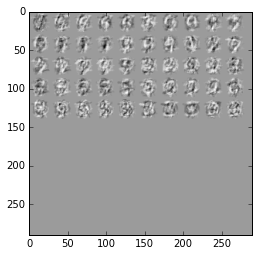

In [4]:

# coding: utf-8

# In[1]:

import numpy as np
import numpy.random as random
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from ReadMNIST import read_mnist, read_mnist_data
from dictionary_learning import k_svd, stochastic_gradient_descent

% matplotlib inline

# get_ipython().magic(u'matplotlib inline')


# In[2]:

# data = read_mnist()
# train, test = data
# train_x, train_y = train
# test_x, test_y = test

# data = read_mnist_data('test')
# test_x = data[0:10]

# In[3]:

#plt.imshow(train_x[0])


# In[8]:

import pickle 

pkl_file = open('sample_data.pkl','rb')
data = pickle.load(pkl_file)
pkl_file.close()

# normalise by column & demean
X = data / linalg.norm(data, axis=0)

m, n = X.shape

# n, row, col = test_x.shape
# X = test_x.reshape(n, row*col)[0:10].T
# print X.shape

# In[9]:

p = 50
D = random.normal(size=[m, p]) 
D = D / linalg.norm(D, axis=0)      # normalise by column

D = k_svd(X, D, mu=5, T=10)


# In[9]:


bigMat = np.zeros((28*10 + 10, 28*10 + 10))

for j in xrange(10):
    for i in xrange(10):
        if j * 10 + i >= p:
            break
        d = D[:,j*10+i].reshape(28,28)
        bigMat[28*j:28*(j+1), 28*i:28*(i+1)] = d

plt.figure(0)
import matplotlib.cm as cm
plt.imshow(bigMat, cmap=cm.Greys_r)

# In[ ]: